Epoch 1/20
7/7 [==============================] - 1s 122ms/step - loss: 1.1313 - accuracy: 0.3014 - val_loss: 1.0823 - val_accuracy: 0.4000
Epoch 2/20
7/7 [==============================] - 1s 105ms/step - loss: 1.0871 - accuracy: 0.3425 - val_loss: 1.0361 - val_accuracy: 0.4000
Epoch 3/20
7/7 [==============================] - 1s 92ms/step - loss: 1.0870 - accuracy: 0.4612 - val_loss: 1.0010 - val_accuracy: 0.5636
Epoch 4/20
7/7 [==============================] - 1s 111ms/step - loss: 1.0821 - accuracy: 0.4018 - val_loss: 0.9816 - val_accuracy: 0.6364
Epoch 5/20
7/7 [==============================] - 1s 98ms/step - loss: 1.0025 - accuracy: 0.4749 - val_loss: 0.9566 - val_accuracy: 0.4727
Epoch 6/20
7/7 [==============================] - 1s 97ms/step - loss: 1.0420 - accuracy: 0.5114 - val_loss: 0.9674 - val_accuracy: 0.5636
Epoch 7/20
7/7 [==============================] - 1s 110ms/step - loss: 0.8936 - accuracy: 0.6347 - val_loss: 0.8418 - val_accuracy: 0.6545
Epoch 8/20
7/7 [=======

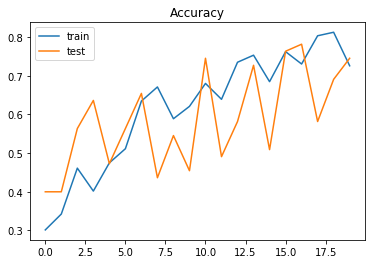

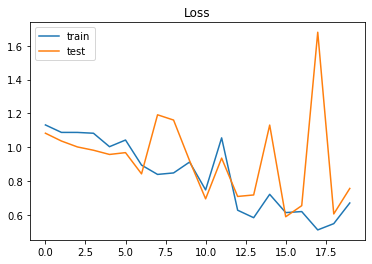

In [2]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')


In [86]:
x

array([[[[0.8509804 , 0.7058824 , 0.53333336],
         [0.84313726, 0.6901961 , 0.52156866],
         [0.84705883, 0.7019608 , 0.5294118 ],
         ...,
         [0.87058824, 0.7254902 , 0.54901963],
         [0.8745098 , 0.70980394, 0.5137255 ],
         [0.85490197, 0.69803923, 0.49411765]],

        [[0.8509804 , 0.7058824 , 0.5411765 ],
         [0.84705883, 0.69411767, 0.5254902 ],
         [0.84705883, 0.69411767, 0.5254902 ],
         ...,
         [0.84705883, 0.7019608 , 0.4862745 ],
         [0.8784314 , 0.7019608 , 0.44705883],
         [0.85882354, 0.6901961 , 0.48235294]],

        [[0.84313726, 0.6901961 , 0.52156866],
         [0.8509804 , 0.68235296, 0.5137255 ],
         [0.84313726, 0.6745098 , 0.49803922],
         ...,
         [0.87058824, 0.72156864, 0.5294118 ],
         [0.87058824, 0.72156864, 0.54509807],
         [0.85882354, 0.7137255 , 0.49803922]],

        ...,

        [[0.6901961 , 0.5686275 , 0.45490196],
         [0.7254902 , 0.59607846, 0.46666667]

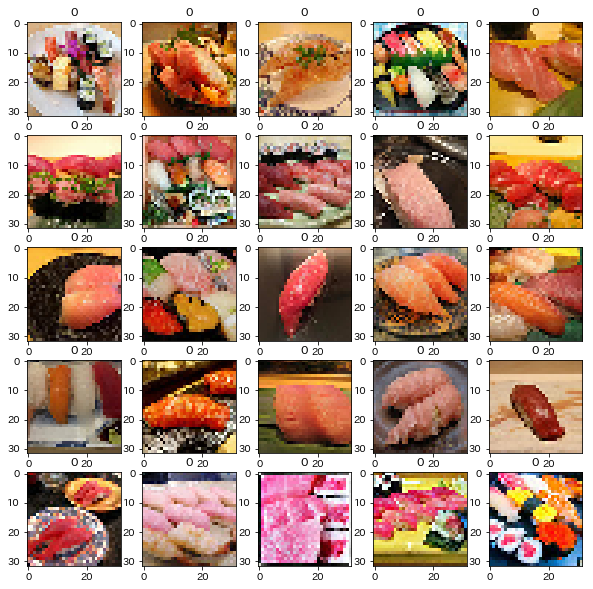

In [83]:
import matplotlib.pyplot as plt
# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']
# 開始インデックス --- (*1)
idx = 0
# pyplotで出力
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x[i + idx])
    plt.title(y[i + idx])
plt.show()

Epoch 1/20
7/7 [==============================] - 1s 95ms/step - loss: 1.1744 - accuracy: 0.3744 - val_loss: 1.0565 - val_accuracy: 0.3636
Epoch 2/20
7/7 [==============================] - 1s 74ms/step - loss: 1.0634 - accuracy: 0.3927 - val_loss: 0.9817 - val_accuracy: 0.4182
Epoch 3/20
7/7 [==============================] - 0s 69ms/step - loss: 0.9244 - accuracy: 0.5525 - val_loss: 1.0165 - val_accuracy: 0.4545
Epoch 4/20
7/7 [==============================] - 1s 73ms/step - loss: 0.8594 - accuracy: 0.5753 - val_loss: 0.8687 - val_accuracy: 0.5091
Epoch 5/20
7/7 [==============================] - 1s 82ms/step - loss: 0.8264 - accuracy: 0.6621 - val_loss: 0.8745 - val_accuracy: 0.5091
Epoch 6/20
7/7 [==============================] - 1s 104ms/step - loss: 0.5907 - accuracy: 0.7991 - val_loss: 1.0304 - val_accuracy: 0.6182
Epoch 7/20
7/7 [==============================] - 1s 106ms/step - loss: 0.5413 - accuracy: 0.7854 - val_loss: 0.7987 - val_accuracy: 0.6182
Epoch 8/20
7/7 [=========

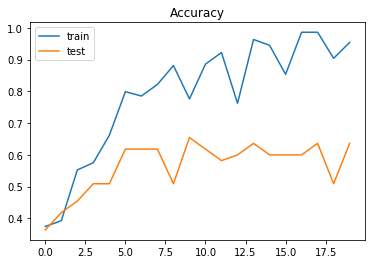

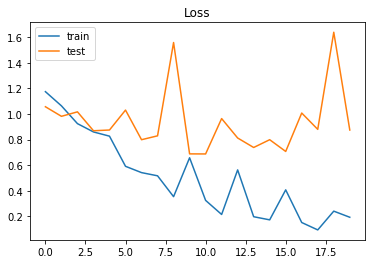

In [4]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデル構造を定義 --- (*6)
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# モデルをコンパイル --- (*7)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*8)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*9)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*10)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model.hdf5')


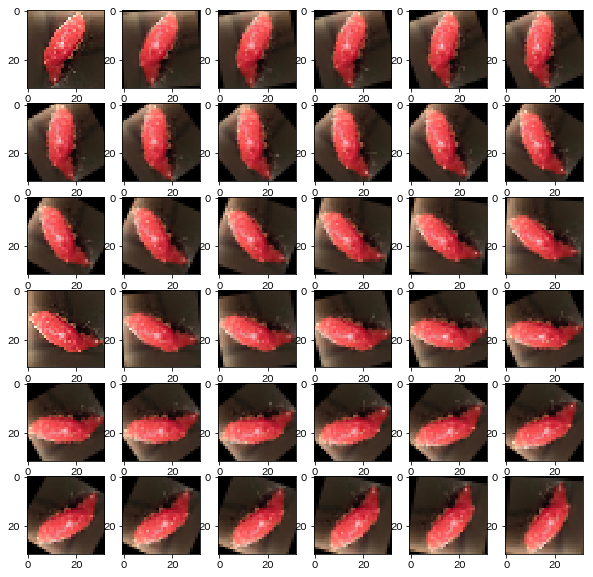

In [102]:
import matplotlib.pyplot as plt
import cv2

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
img = x[12] # 分かりやすい写真を選択

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    center = (16, 16)
    angle = i * 5 # 角度を変えて出力
    scale = 1
    mtx = cv2.getRotationMatrix2D(center, angle, scale)
    img2 = cv2.warpAffine(img, mtx, (32, 32))
    plt.imshow(img2)
plt.show()


In [ ]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力を指定
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# 学習用データを水増しする --- (*1)
x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        # 回転させる --- (*2)
        center = (16, 16) # 回転の中心点
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        # さらに左右反転させる --- (*3)
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)        
        
# 水増しした画像を学習用に置き換える
print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))

# CNNモデル構造を定義 --- (*6)
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# モデルをコンパイル --- (*7)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*8)
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=7,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*9)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*10)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model.hdf5')


In [ ]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

target_image = "test-sushi.jpg"

im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["寿司", "サラダ", "麻婆豆腐"]
CALORIES = [588, 118, 648]

# 保存したCNNモデルを読み込む
model = cnn_model.get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 答えを表示
    print("この写真は、", LABELS[idx], "で、カロリーは", CALORIES[idx],"kcal")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    check_photo_str('test-sushi.jpg')
    check_photo_str('test-salad.jpg')
